<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, SS17

# Assignment 5 - Jacobians

In [1]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import sympy as sp

            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython

### Jacobians

*This assignment will require some reading. Brace yourself. [Here](http://excelsior.cs.ucsb.edu/courses/cs290n_cg_modeling/notes/uiuc_notes/chap5.pdf) is a chapter which you may consider as an introduction to the topic.*

The following figure shows a robot arm with three rotational joints and two links:

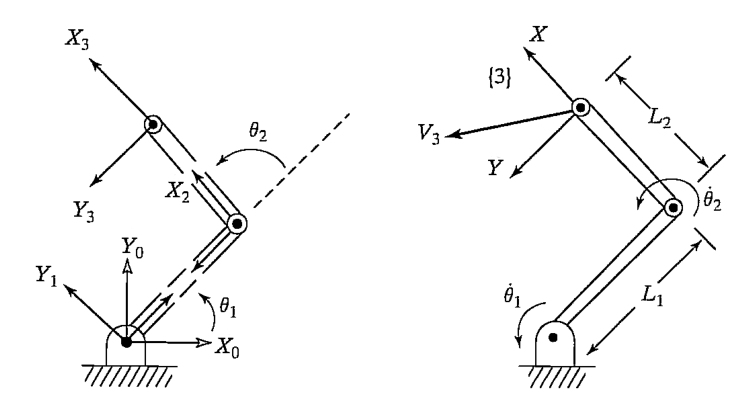

In [2]:
IPython.core.display.Image(r"images/robot_arm001.png")

The left part of the above figure shows four different frames attached to the arm of the robot, namely frames $0$, $1$, $2$, and $3$. $X_0$ and $Y_0$ describe the base frame, $Y_1$ is the unit vector pointing to the direction of the first link's $Y$ axis, $X_2$ denotes the direction of the second link's $X$ axis, and finally, $X_3$ and $Y_3$ specify the orientation of the end effector's frame, which you can assume to be fixed.

1. Specify the transformation matrices between frame 0 and frame 1, between frame 1 and frame 2, and finally the transformation between frame 2 and frame 3.
<br>
<p>Assuming angular velocities are expressed using a common frame, they can be added as vectors. Now, given link number $i$, its velocity will be whatever the velocity of link $i-1$ was, plus whatever velocities were added by joint $i$. Another way to think of this is the following: before you can add the angular velocities, you have to transform one of the velocities to the coordinate frame of the other.</p>
<br>
2. Specify the term to compute the angular velocity $\omega_i$ in terms of $\omega_{i-1}$ with respect to frame $i-1$. Remember that angular velocity is the derivative of a joint value $\theta$ with respect to a rotation axis.
<br><br>
3. Specify the Jacobian matrix that relates the velocity of the end effector relative to the joint angles of the robotic arm!
<br><br>
4. Does the Jacobian have an inverse? If so, is the matrix *always* invertible? What is the physical meaning of the matrix inverse?
<br><br>
5. Does the Jacobian always have full rank? How does the rank of the Jacobian affect the velocity mapping?



### Your solution

---
1.
<p>
<i>Transformation of frame  1 with respect to frame  0,</i>
$ 
^{0}_1T=
\begin{bmatrix} 
\cos\theta_1 & -\sin\theta_1 &0 &0\\
\sin\theta_1 & \cos\theta_1 &0 &0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
$
<br><br><br><br>
<i> Transformation of frame 2 with respect to frame 1,</i> 
$
^{1}_2T=
\begin{bmatrix} 
\cos\theta_2 & -\sin\theta_2 &0 &L_1\\
\sin\theta_2 & \cos\theta_2 &0 &0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
$
<br><br><br><br>
<i> Transformation of frame 3 with respect to frame 2,</i> 
$ 
^{2}_3T=
\begin{bmatrix} 
1 & 0 & 0 &L_2\\
0 & 1 & 0 &0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
$
</p><br><br><br>
2. <p>$\omega_{i}=\dot{\theta_{i}}+\omega_{i-1}$<br><br>
Here,<br> $\omega_{i}$:          is the angular velocity of frame i; <br>
$\dot{\theta_{i}}$:              is the linear velocity of frame i; <br>
$\omega_{i-1}$:                  is the angular velocity of frame i-1; <br><br>
</p>
3. <p>
$J(\theta) =
\left[\begin{matrix}- L_{1} \sin{\left (\theta_{1} \right )} - L_{2} \sin{\left (\theta_{1} + \theta_{2} \right )} & - L_{2} \sin{\left (\theta_{1} + \theta_{2} \right )}\\L_{1} \cos{\left (\theta_{1} \right )} + L_{2} \cos{\left (\theta_{1} + \theta_{2} \right )} & L_{2} \cos{\left (\theta_{1} + \theta_{2} \right )}\end{matrix}\right]
$.</p> <p>This can be used to find the cartesian velocities of the end effector with respect to the joint angles as:
$\begin{bmatrix}\dot{x}\\\dot{y}\end{bmatrix} = J(\theta)\begin{bmatrix}\dot{\theta_1}\\\dot{\theta_2}\end{bmatrix}$
</p>
4. <p>No, a Jacobian matrix is invertible $iff$ the matrix is square and non-singular.</p> <p>A matrix is in essence a transformation that when applied to some vector transforms the vector to give a new vector. An inverse of the matrix does the exact opposite of this. It can reverse the transformation created by the original matrix. </p><br>
5. <p>  No, a Jacobian matrix does not always have full rank. The rank of the jacobian depends on the configuration. At _singular_ configurations, the rank of the Jacobian may not be full rank. These are often correponding to the boundaries of the workspace</p> <p> Rank of the Jacobian has direct relation to the velocity mapping, if the Jacobian does not have full rank, i.e., if there is singularity in configuration, it would mean that certain velocities may be unattainable by the end effector.</p>


### Finding joint velocities for a given Cartesian velocity profile

For this assignment, you will have to use just the linear part of the Jacobian to derive joint velocities for a given Cartesian velocity of the end-effector

1. Specify the equations that relate the Cartesian positions ($x$,$y$) of the tip of link 1 and of the end-effector (the tip of link 2) to the configuration space variables ($\theta_1$ and $\theta_2$).
2. Use sympy to calculate the corresponding Jacobian which relates Cartesian velocities of the end-effector to the joint velocities.
3. Use $\theta_1 = \theta_2 = \frac{\pi}{4} \frac{rad}{s}$ as the starting position and set the required Cartesian velocities as: $\frac{dx}{dt} = 0.01 \frac{m}{s}$, $\frac{dy}{dt} = 0.0 \frac{m}{s}$. Assume a length of 1.0 m for both links.
4. Calculate joint velocities using the Jacobian and update the current joint angles.
5. Iterate 10 times and plot the positions of the two end-effectors and the links. Your output should look similar to the plot below.
6. Now increase the iterations to 50. Explain why the joints seem to jump around. At what point did that happen, and what can you say about the Jacobian at this point?

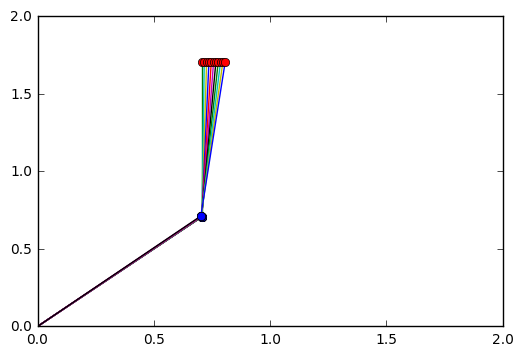

In [3]:
IPython.core.display.Image(r"images/joint_positions.png")

---
*Solution 1.* 
$$
x_{link1} = L_1 \cos\theta_1 \\
y_{link1} = L_1 \sin\theta_1 \\
x_{link2} = L_1 \cos\theta_1 + L_2 \cos (\theta_1+\theta_2)\\
y_{link2} = L_1 \sin\theta_1 + L_2 \sin (\theta_1+\theta_2)
$$

Symbolic Jacobian Matrix::
Matrix([[-L1*sin(theta1) - L2*sin(theta1 + theta2), -L2*sin(theta1 + theta2)], [L1*cos(theta1) + L2*cos(theta1 + theta2), L2*cos(theta1 + theta2)]])

Jacobian Matrix which relates Cartesian velocities of the end-effector to the joint velocities::
Matrix([[-1.70710678118655, -1.00000000000000], [0.707106781186548, -0.e-103]])

Angular velocities at joint:: 
[0, -0.0100000000000000]

Joint angles (theta_1,theta_2) after 1 second: 
0.785398163397448  and  0.775398163397448

===========10 iterations============


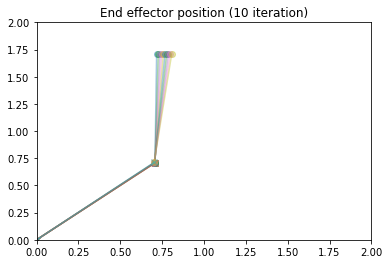



===========50 iterations============


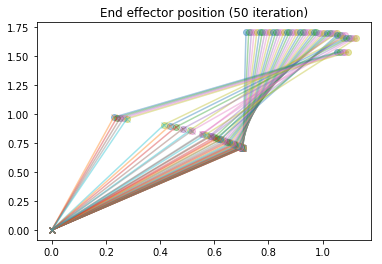

In [2]:
"""
For inverse Kinematic problems, 
angular velocities at the joints can be calculated from cartesian velocities of end effector by:
[w1,w2].T= J^(-1) [v_x,v_y].T

where, w1,w2 are angular velocities at the joint; and
v_x,v_y are the linear velocities of the end effector
"""

theta1, theta2, L1, L2 = sp.symbols('theta1, theta2, L1, L2')

f_x= L1*sp.cos(theta1)+L2*sp.cos(theta1+theta2)
f_y= L1*sp.sin(theta1)+L2*sp.sin(theta1+theta2)

X = sp.Matrix([f_x, f_y])
Y = sp.Matrix([theta1, theta2])
sym_jac = X.jacobian(Y)

print "Symbolic Jacobian Matrix::\n", sym_jac
print ""

"""
print "~~~~~~~~~~~~~~~"
print sp.latex(sym_jac)
print "~~~~~~~~~~~~~~~"
"""

jac_value = sym_jac.evalf(subs={theta1:sp.pi/4, theta2:sp.pi/4, L1:1, L2:1})
print "Jacobian Matrix which relates Cartesian velocities of the end-effector to the joint velocities::\n", jac_value
print ""
jac_inverse=jac_value.inv()

lin_vel=sp.Matrix([0.01,0.0])

ang_vel_joint=jac_inverse.dot(lin_vel)
print "Angular velocities at joint:: \n",ang_vel_joint

print""
print "Joint angles (theta_1,theta_2) after 1 second: \n",(ang_vel_joint[0]+pi/4)," and ", (ang_vel_joint[1]+pi/4)


print""
print"===========10 iterations============"
P1=[]
P2=[]
theta_1i=sp.pi/4+ang_vel_joint[0]
theta_2i=sp.pi/4+ang_vel_joint[1]

x_p1=1*sp.cos(theta_1i)
y_p1=1*sp.sin(theta_1i)

x_p2=1*sp.cos(theta_1i)+1*sp.cos(theta_1i+theta_2i)
y_p2=1*sp.sin(theta_1i)+1*sp.sin(theta_1i+theta_2i)

#Intial coordinates of the joints
P1.append([x_p1,y_p1])                      
P2.append([x_p2,y_p2])

for i in xrange(1,11):
    
    #Changing jacobian value with changed angles
    jac_value = sym_jac.evalf(subs={theta1:theta_1i, theta2:theta_2i, L1:1, L2:1})
    jac_inverse=jac_value.inv()
    ang_vel_joint=jac_inverse.dot(lin_vel)
    
    #updating angles
    theta_1i=theta_1i+ang_vel_joint[0]
    theta_2i=theta_2i+ang_vel_joint[1]
    
    x_p1=1*sp.cos(theta_1i)
    y_p1=1*sp.sin(theta_1i)

    x_p2=1*sp.cos(theta_1i)+1*sp.cos(theta_1i+theta_2i)
    y_p2=1*sp.sin(theta_1i)+1*sp.sin(theta_1i+theta_2i)
    
    P1.append([x_p1,y_p1])
    P2.append([x_p2,y_p2])

P1=np.array(P1)
P2=np.array(P2)
P0=np.zeros(np.shape(P1))

fig = plt.figure()
ax = fig.add_subplot(111)
for i in xrange (10):
    ax.plot([P1[i,0],P2[i,0]],[P1[i,1],P2[i,1]],marker='o',alpha=.4)
    ax.plot([P0[i,0],P1[i,0]],[P0[i,1],P1[i,1]],marker='x',alpha=.4)
    
plt.axis([0, 2, 0, 2])
plt.title('End effector position (10 iteration)')
plt.show()


print""
print""
print"===========50 iterations============"    
P1=[]
P2=[]
theta_1i=sp.pi/4+ang_vel_joint[0]
theta_2i=sp.pi/4+ang_vel_joint[1]

x_p1=1*sp.cos(theta_1i)
y_p1=1*sp.sin(theta_1i)

x_p2=1*sp.cos(theta_1i)+1*sp.cos(theta_1i+theta_2i)
y_p2=1*sp.sin(theta_1i)+1*sp.sin(theta_1i+theta_2i)

P1.append([x_p1,y_p1])
P2.append([x_p2,y_p2])

for i in xrange(1,51):
    jac_value = sym_jac.evalf(subs={theta1:theta_1i, theta2:theta_2i, L1:1, L2:1})
    jac_inverse=jac_value.inv()
    ang_vel_joint=jac_inverse.dot(lin_vel)
    
    
    theta_1i=theta_1i+ang_vel_joint[0]
    theta_2i=theta_2i+ang_vel_joint[1]
    
    x_p1=1*sp.cos(theta_1i)
    y_p1=1*sp.sin(theta_1i)

    x_p2=1*sp.cos(theta_1i)+1*sp.cos(theta_1i+theta_2i)
    y_p2=1*sp.sin(theta_1i)+1*sp.sin(theta_1i+theta_2i)
    
    P1.append([x_p1,y_p1])
    P2.append([x_p2,y_p2])
    
P1=np.array(P1)
P2=np.array(P2)
P0=np.zeros(np.shape(P1))

fig = plt.figure()
ax = fig.add_subplot(111)
for i in xrange (50):
    ax.plot([P1[i,0],P2[i,0]],[P1[i,1],P2[i,1]],marker='o',alpha=.4)
    ax.plot([P0[i,0],P1[i,0]],[P0[i,1],P1[i,1]],marker='x',alpha=.4)
    
plt.title('End effector position (50 iteration)')
plt.show()


Answer to 6) here:

6) In this case, we are incrementing the x velocity but keeping the y velocity as zero. So, after few iterations, we have a condition where the position of the arm becomes almost straight. This is the boundary region of the end effector operating space. At this point, the Jacobian losses it's rank as we reached a singularity in configuration. Beyond this, solution obtained are trivial.

